In [1]:
# import the needed libraries

from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt

import sklearn.metrics

from sklearn.metrics import classification_report

from sklearn.tree import DecisionTreeClassifier

from sklearn.cross_validation import train_test_split

# Getting and cleaning data

AH_data = pd.read_csv(r'D://tree_addhealth.csv')

data_clean = AH_data.dropna()

C:\Users\LeminaYacoub\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [16]:
# Set the Predictors/ Input variables / Features

predictors =data_clean[['PARPRES','marever1']]

In [17]:
#Set the target variable 

targets = data_clean.EXPEL1

In [18]:
# 60% of the data will be considered for trainin and 40% for testing

pred_train, pred_test, tar_train, tar_test  =   train_test_split(predictors, targets, test_size=.4)

In [31]:
#Setting the classifier

classifier=DecisionTreeClassifier()
classifier=classifier.fit(pred_train,tar_train)

predictions=classifier.predict(pred_test)

sklearn.metrics.confusion_matrix(tar_test,predictions)
sklearn.metrics.accuracy_score(tar_test, predictions)

0.9590163934426229

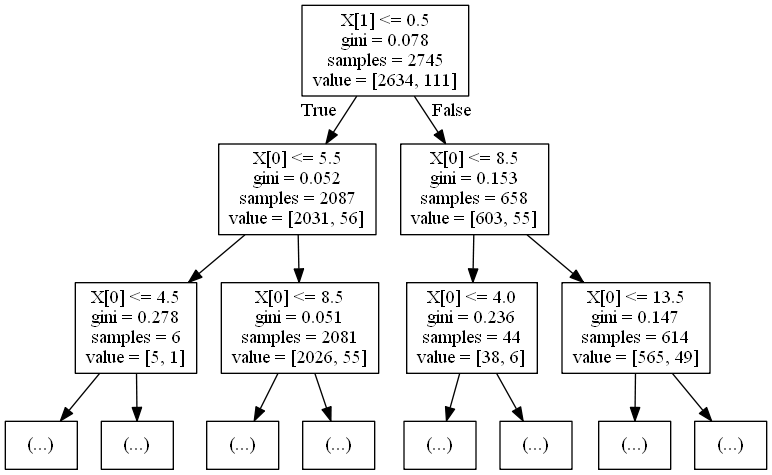

In [29]:
import io
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn import tree
dot_data = io.StringIO()

tree=export_graphviz(classifier, out_file=dot_data,max_depth=2)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

#### I have included marijuana use and parental presence as input variables to my  classification tree model evaluating the experience with being expelled from school( the response variable).

#### Model's score on the test set is 95.9%

#### Marijuana use (second input x1) separated the sample into two subgroups.

#### It showed that adolescents having smoked Marijuana 2078 and had not their parents present were more likely to be expelled from school 2081 from 2087. while those who have smoked and had their parents assistance were less likely to be expelled (6 individuals from 2087)

#### Adolescents who had not smoked Marijuana and had  their parents present were less likely to be expelled 44 from 658 individuals while those who have not smoked and their parents were absent were more expelled from school (614) 